# CMPS-320 Homework #2
## Principle Component Analysis (PCA) Practice
Elijah Campbell-Ihim

10/9/23

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')


%matplotlib inline
plt.style.use('seaborn-v0_8-white')

## Question 1

#### Code for calculating principle components and explained variance

In [2]:
# Given covariance matrix*
C = np.array([[5, 2], [2, 2]])

#Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(C)

lambda1, lambda2 = eigenvalues
v1, v2 = eigenvectors.T

#Calculate principal components Y1 and Y2 for given C
X1 = np.array([5, 2])
X2 = np.array([2, 2])
Y1 = np.dot(v1, X1)
Y2 = np.dot(v2, X2)

#Calculate proportion of variance explained by Y1
variance_explained = lambda1 / (lambda1 + lambda2)

print("Principal Component Y1:", Y1)
print("Principal Component Y2:", Y2)
print("Proportion of Variance Explained by Y1:", variance_explained)


Principal Component Y1: 5.366563145999495
Principal Component Y2: 0.8944271909999159
Proportion of Variance Explained by Y1: 0.8571428571428571


#### (a) Determine the population principal components Y1 and Y2 for the above covariance matrix.

Y1: 5.367

Y2: 0.894

#### (b) Calculate the proportion of the total population variance explained by the first principal component.

85.71% of the variance is explained by the first principle component

## Question 2

### Import Code From Link

In [3]:
%pip install ucimlrepo
from ucimlrepo import fetch_ucirepo 


Note: you may need to restart the kernel to use updated packages.


In [4]:
# fetch dataset 
optical_recognition_of_handwritten_digits = fetch_ucirepo(id=80) 
  
# data (as pandas dataframes) 
X = optical_recognition_of_handwritten_digits.data.features 
y = optical_recognition_of_handwritten_digits.data.targets 
  
# metadata 
print(optical_recognition_of_handwritten_digits.metadata) 
  
# variable information 
print(optical_recognition_of_handwritten_digits.variables) 

optical_recognition_of_handwritten_digits.data.features.tail()

{'uci_id': 80, 'name': 'Optical Recognition of Handwritten Digits', 'repository_url': 'https://archive.ics.uci.edu/dataset/80/optical+recognition+of+handwritten+digits', 'data_url': 'https://archive.ics.uci.edu/static/public/80/data.csv', 'abstract': 'Two versions of this database available; see folder', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 5620, 'num_features': 64, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1998, 'last_updated': 'Wed Aug 23 2023', 'dataset_doi': '10.24432/C50P49', 'creators': ['E. Alpaydin', 'C. Kaynak'], 'intro_paper': {'title': 'Methods of Combining Multiple Classifiers and Their Applications to Handwritten Digit Recognition', 'authors': 'C. Kaynak', 'published_in': 'MSc Thesis, Institute of Graduate Studies in Science and Engineering, Bogazici University', 

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute55,Attribute56,Attribute57,Attribute58,Attribute59,Attribute60,Attribute61,Attribute62,Attribute63,Attribute64
5615,0,0,4,10,13,6,0,0,0,1,...,4,0,0,0,2,14,15,9,0,0
5616,0,0,6,16,13,11,1,0,0,0,...,1,0,0,0,6,16,14,6,0,0
5617,0,0,1,11,15,1,0,0,0,0,...,0,0,0,0,2,9,13,6,0,0
5618,0,0,2,10,7,0,0,0,0,0,...,2,0,0,0,5,12,16,12,0,0
5619,0,0,10,14,8,1,0,0,0,2,...,8,0,0,1,8,12,14,12,1,0


### Dropping Unary Columns and Null Values

In [5]:
# Function to drop unary columns
def drop_unary_columns(df):
    # Iterate through columns and drop unary columns
    for col in df.columns:
        if len(df[col].unique()) == 1:
            df.drop(col, axis=1, inplace=True)
    return df

# Drop unary columns
X = drop_unary_columns(X)


In [6]:
X = X.dropna()
X.describe()

,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,...,Attribute55,Attribute56,Attribute57,Attribute58,Attribute59,Attribute60,Attribute61,Attribute62,Attribute63,Attribute64
count,5620.000000,5620.000000,5620.000000,5620.000000,5620.000000,5620.000000,5620.000000,5620.000000,5620.000000,5620.000000,...,5620.000000,5620.000000,5620.000000,5620.000000,5620.000000,5620.000000,5620.000000,5620.000000,5620.000000,5620.000000
mean,0.302135,5.393238,11.815480,11.578292,5.593772,1.379359,0.138256,0.003203,1.971174,10.514947,...,3.737900,0.166904,0.000356,0.281851,5.760498,11.989680,11.572420,6.720819,2.093594,0.254093
std,0.879962,4.672719,4.255952,4.462546,5.631149,3.356633,1.046998,0.090423,3.098815,5.431280,...,4.906909,0.843455,0.018863,0.929969,5.021145,4.347542,4.975675,5.815564,4.047959,1.418558
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,10.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,10.000000,9.000000,0.000000,0.000000,0.000000
50%,0.000000,5.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,12.000000,...,1.000000,0.000000,0.000000,0.000000,5.000000,13.000000,13.000000,6.000000,0.000000,0.000000
75%,0.000000,9.000000,15.000000,15.000000,10.000000,0.000000,0.000000,0.000000,3.000000,15.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,15.000000,16.000000,12.000000,2.000000,0.000000
max,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,5.000000,16.000000,16.000000,...,16.000000,13.000000,1.000000,10.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


### Standardize Data

In [7]:
#function to standardize data
def standardizeData(df):
    from sklearn.preprocessing import StandardScaler

    # Create a StandardScaler object
    scaler = StandardScaler()

    # Fit the scaler to data 
    scaler.fit(df)

    # Transform data using the scaler to standardize it
    return pd.DataFrame(scaler.transform(df))



In [8]:
X = standardizeData(X)
X.describe()

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
count,5.620000e+03,5.620000e+03,5.620000e+03,5.620000e+03,5.620000e+03,5.620000e+03,5.620000e+03,5.620000e+03,5.620000e+03,5.620000e+03,...,5.620000e+03,5.620000e+03,5.620000e+03,5.620000e+03,5.620000e+03,5.620000e+03,5.620000e+03,5.620000e+03,5.620000e+03,5.620000e+03
mean,2.528622e-17,5.057244e-17,-1.921753e-16,1.112594e-16,9.608763e-17,3.413639e-17,2.907915e-17,-1.011449e-17,1.011449e-17,9.798410e-17,...,2.781484e-17,-7.585866e-18,6.953710e-18,-5.057244e-17,2.022897e-17,-1.416028e-16,2.022897e-17,-2.022897e-17,5.183675e-17,3.540071e-17
std,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00,...,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00
min,-3.433810e-01,-1.154300e+00,-2.776472e+00,-2.594779e+00,-9.934509e-01,-4.109719e-01,-1.320619e-01,-3.542401e-02,-6.361624e-01,-1.936170e+00,...,-7.618305e-01,-1.978989e-01,-1.886792e-02,-3.031022e-01,-1.147350e+00,-2.758052e+00,-2.326006e+00,-1.155764e+00,-5.172435e-01,-1.791362e-01
25%,-3.433810e-01,-9.402726e-01,-4.266124e-01,-5.778139e-01,-9.934509e-01,-4.109719e-01,-1.320619e-01,-3.542401e-02,-6.361624e-01,-8.313600e-01,...,-7.618305e-01,-1.978989e-01,-1.886792e-02,-3.031022e-01,-9.481746e-01,-4.576970e-01,-5.170451e-01,-1.155764e+00,-5.172435e-01,-1.791362e-01
50%,-3.433810e-01,-8.416372e-02,2.783455e-01,3.186151e-01,-2.830531e-01,-4.109719e-01,-1.320619e-01,-3.542401e-02,-6.361624e-01,2.734504e-01,...,-5.580181e-01,-1.978989e-01,-1.886792e-02,-3.031022e-01,-1.514726e-01,2.324095e-01,2.869373e-01,-1.239575e-01,-5.172435e-01,-1.791362e-01
75%,-3.433810e-01,7.719451e-01,7.483174e-01,7.668296e-01,7.825436e-01,-4.109719e-01,-1.320619e-01,-3.542401e-02,3.320356e-01,8.258556e-01,...,6.648564e-01,-1.978989e-01,-1.886792e-02,-3.031022e-01,8.444049e-01,6.924805e-01,8.899242e-01,9.078486e-01,-2.312342e-02,-1.791362e-01
max,8.748733e+00,2.270136e+00,9.833034e-01,9.909369e-01,1.848140e+00,4.356133e+00,1.515108e+01,5.526540e+01,4.527560e+00,1.009991e+00,...,2.499168e+00,1.521628e+01,5.300000e+01,1.045090e+01,2.039458e+00,9.225160e-01,8.899242e-01,1.595719e+00,3.435718e+00,1.110092e+01


### Perform PCA

In [9]:
from sklearn.decomposition import PCA

# Specify the number of components you want after PCA
n_components = len(X.columns)

# Create a PCA instance
pca = PCA(n_components=n_components)

# Fit the data to the PCA model
X_pca = pca.fit_transform(X)

# Now X_pca contains the transformed data with reduced dimensions (in our case dimensions are the same)
print("Original shape: ", X.shape)
print("Reduced shape: ", X_pca.shape)


Original shape:  (5620, 62)
Reduced shape:  (5620, 62)


### PVE Plots

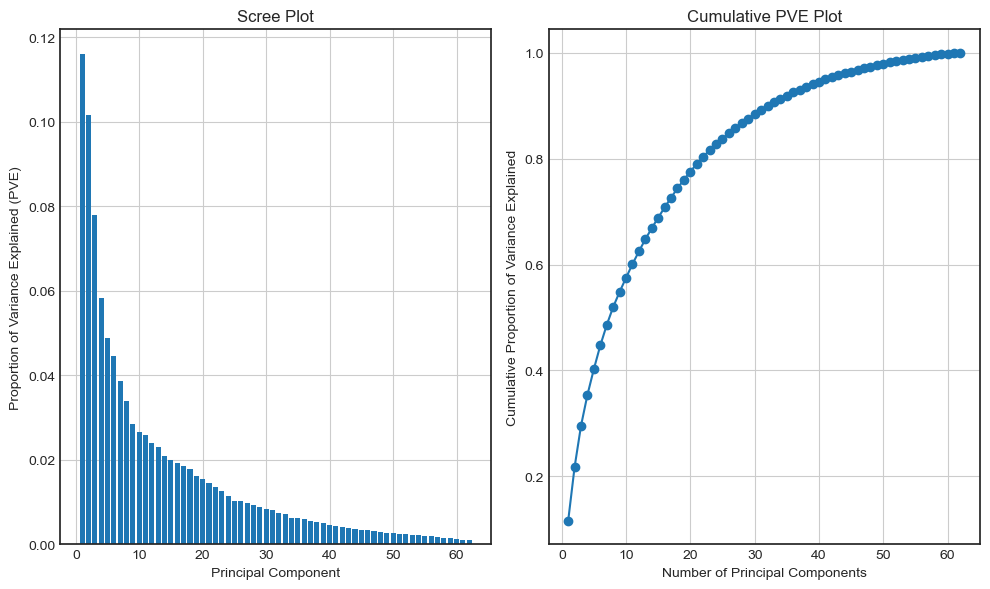

In [10]:
# Calculate the proportion of variance explained (PVE) for each component
pve = pca.explained_variance_ratio_

# Calculate cumulative PVE
cumulative_pve = np.cumsum(pve)

# Plot scree plot
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.bar(range(1, len(pve) + 1), pve, align='center')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained (PVE)')
plt.title('Scree Plot')
plt.grid(True)

# Plot cumulative PVE
plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_pve) + 1), cumulative_pve, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Proportion of Variance Explained')
plt.title('Cumulative PVE Plot')
plt.grid(True)

plt.tight_layout()
plt.show()

The plots above show the amount of variance explained by each principle component. As the plot on the right shows, the plot starts to flatten out around 40 principle components. This means that having more than 40 principle components begins to have diminishing returns. We can retain about 90-95% of the variance in the data by only having 40 principle components (essentially reducing the data to 40 features). 

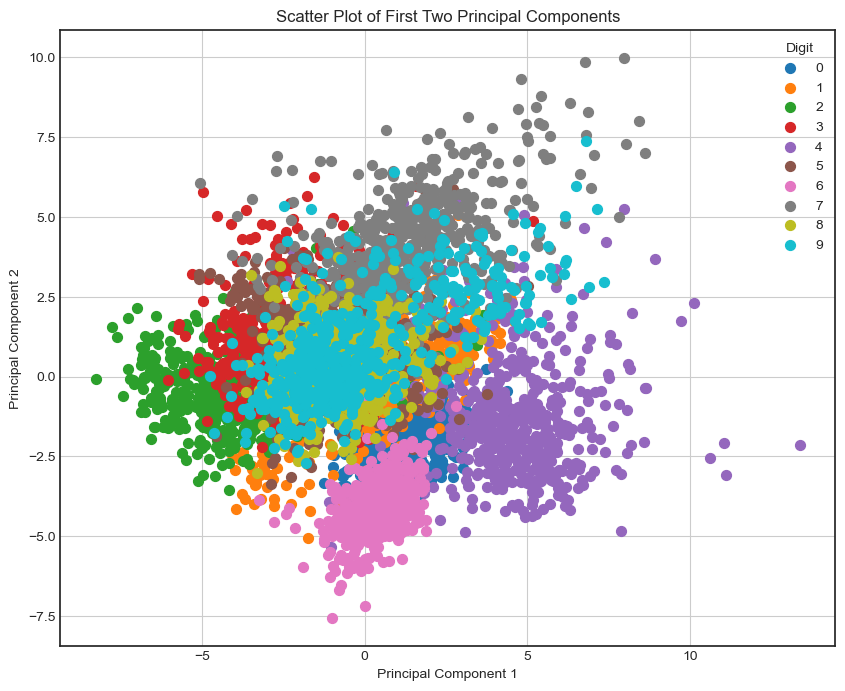

In [11]:
# Create a scatter plot for the first two principal components
plt.figure(figsize=(10, 8))
for i in range(10):  
    indices = y == i
    indices = np.squeeze(indices)
    plt.scatter(X_pca[indices, 0], X_pca[indices, 1], label=str(i), s=50)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of First Two Principal Components')
plt.legend(title='Digit')
plt.grid(True)
plt.show()

The above scatter plot shows that the 2 principle components are fairly good predictors in predicting handwritten digits. The most promising attribute of the plot is that similar colors are grouped together. Since the different colors represent different handwritten digit classifications, it is good that similar colors are grouped together (as that means better model accuracy). The model is overlapping, which means that the model could inaccrurately predict data that falls within the overlapping regions. All in all, the first and second principle components are moderately good predictors in classifying handwritten digits. 